In [47]:
import numpy as np
from itertools import product
from tqdm import tqdm

의문1.
이미지 분류도 일종의 MDP?
- MDP : 현재상태에 모든 정보를 포함하여 다음 선택을 진행
--> 이미지도 인풋으로 주어지는 시점에서 모든 정보가 포함됨 --> 따라서 MDP이다?



## 지속적 가치의 상태가치함수 구현
구현을 위한 가정
1. 모든 경우의수를 비교해 최적 정책을 선택하는 총 8개의 벡터로 진행 , 모든 상태를 계산(경우의수 256)
2. 스텝마다 8개의 모든 벡터를 정확히 맞출경우 +1, 틀릴경우 0으로 진행(구현 편의를 위함)

    2-1. 스텝마다 하나씩 순서대로 바꿔가면서 진행 (STATE : 0 0 0 0 0 0 0 0 , ACTION : 하나씩 순차적으로 변경 , REWARD : 일치 +1 OR NOT +0)

3. 256개의 정책에 대해서 100번의 시뮬레이션 진행하여 가치상태함수 계산
4. t=0 부터 시작,(즉 discount 계산 시 할인율이 적용되지 않은 gammma**0 부터 합산)



In [48]:
gamma = 0.9 # 할인율
steps = 100 # 

policy_result = []  # 각 정책의 상태가치함수 근사치
discount = [gamma**i for i in range(steps)]

# 라벨 초기화
temp_array = np.array([0,0,0,0,1,1,1,1])

#정답 라벨
target = np.random.permutation(temp_array)


print(f"정답 라벨 : {target}")

# 모든 정책 (256가지 경우의 수)
all_policies =   list(product((0,1),repeat=8))

#각 정책마다 100번의 시뮬레이션 진행
for policy in all_policies:
    Goal = 0
    for step in range(steps):
        pred_val = policy[step%8]
        target_val = target[step%8]
        if target_val == pred_val:
            # goal+=
            Goal+=  1 *discount[step]
    policy_result.append(Goal)


best_idx = np.argmax(policy_result)
worst_idx =np.argmin(policy_result)


print(f"가장 높은 상태가치함수 : {policy_result[best_idx]}, 정책 : {all_policies[best_idx]}, 정확도 : {np.mean(target==all_policies[best_idx])}")
print(f"가장 낮은 상태가치함수 : {policy_result[worst_idx]}, 정책 : {all_policies[worst_idx]}, 정확도 : {np.mean(target==all_policies[worst_idx])}")

정답 라벨 : [0 0 0 0 1 1 1 1]
가장 높은 상태가치함수 : 9.999734386011122, 정책 : (0, 0, 0, 0, 1, 1, 1, 1), 정확도 : 1.0
가장 낮은 상태가치함수 : 0, 정책 : (1, 1, 1, 1, 0, 0, 0, 0), 정확도 : 0.0


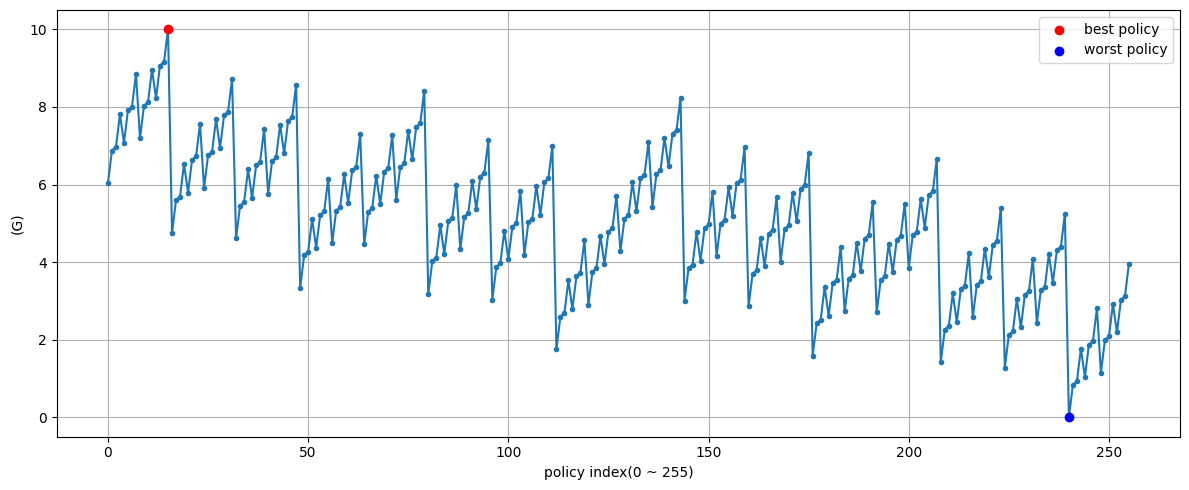

In [49]:
# 사용자가 작성한 로직을 그대로 구현해서 policy_result 생성

from itertools import product
import numpy as np
import matplotlib.pyplot as plt

# 설정
gamma = 0.9
steps = 100
discount = [gamma**i for i in range(steps)]


# 모든 정책
# all_policies = list(product((0,1), repeat=8))
policy_result = []

# 정책별 시뮬레이션
for policy in all_policies:
    Goal = 0
    for step in range(steps):
        pred_val = policy[step % 8]
        target_val = target[step % 8]
        if target_val == pred_val:
            Goal += discount[step]
    policy_result.append(Goal)

# 최고/최저 정책 인덱스
best_idx = np.argmax(policy_result)
worst_idx = np.argmin(policy_result)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(policy_result, marker='o', linestyle='-', markersize=3)
# plt.title("각 정책의 누적 할인 보상 (상태가치 근사)")
plt.xlabel("policy index(0 ~ 255)")
plt.ylabel("(G)")
plt.grid(True)

# 최고/최저 강조
plt.scatter(best_idx, policy_result[best_idx], color='red', label='best policy', zorder=5)
plt.scatter(worst_idx, policy_result[worst_idx], color='blue', label='worst policy', zorder=5)
plt.legend()
plt.tight_layout()
plt.show()

# 결론 : 2장의 내용은 사실상 브루트포스 알고리즘이다?

--> 그렇다면 벡터가 100건인 경우로 해본다면?

--> 모든 경우의 수가  2^100 = 1,267,650,600,228,229,400,000,000,000,000이므로 사실상 브루트 포스는 불가능에 가까움

--> 랜덤으로 샘플하여 이전과 동일하게 256개에 대해서 진행 

In [171]:
gamma = 0.9 # 할인율
steps = 10000 # 

policy_result = []  # 각 정책의 상태가치함수 근사치
discount = [gamma**i for i in range(steps)]

# 라벨 초기화  총 100장의 2클래스 이미지
temp_array = np.concatenate([[0]*50,[1]*50])

#정답 라벨
target = np.random.permutation(temp_array)


print(f"정답 라벨 : {target}")

# 랜덤으로 샘플링되었다고 가정하여 얻은 정책 (256개)
all_policies = np.random.randint(0, 2, size=(256, len(temp_array)))


#각 정책마다 100번의 시뮬레이션 진행
for policy in (all_policies):
    Goal = 0
    for step in range(steps):
        pred_val = policy[step%len(temp_array)]
        target_val = target[step%len(temp_array)]
        if target_val == pred_val:
            # goal+=
            Goal+=  1 *discount[step]
    policy_result.append(Goal)


best_idx = np.argmax(policy_result)
worst_idx =np.argmin(policy_result)

print(f"가장 높은 상태가치함수 : {policy_result[best_idx]:.4f}, \n정책 : {all_policies[best_idx]}, \n정확도 : {np.mean(target==all_policies[best_idx])}")
print(f"가장 낮은 상태가치함수 : {policy_result[worst_idx]:.4f}, \n정책 : {all_policies[worst_idx]}, \n정확도 : {np.mean(target==all_policies[worst_idx])}")

정답 라벨 : [1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0]
가장 높은 상태가치함수 : 8.2012, 
정책 : [0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1], 
정확도 : 0.57
가장 낮은 상태가치함수 : 1.6958, 
정책 : [0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1], 
정확도 : 0.37


# 샘플링을 하더라도, 본질적으로 브루트 포스에 가깝다?

# 최종 결론 : 벨만 방정식을 도입하기 전까지는 브루트 포스와 큰 차이가 없다...

	ㅁ	MDP는 상태공간이 크고, 모든 정책을 평가할 수 없는 경우에도
--> value iteration, policy iteration, reinforcement learning 등을 써서 최적 정책 근사 가능

	ㅁ	브루트포스는 가능한 경우의 수가 많아지면 불가능해짐

# 위의 식을 벨만방정식으로 정의할 수 있을까?

이전에 사용했던 가정
1. 모든 경우의수를 비교해 최적 정책을 선택하는 총 100개의 벡터로 진행 , 샘플링하여여 상태를 계산(경우의수 256)
2. 스텝마다 100개의 모든 벡터를 정확히 맞출경우 +1, 틀릴경우 0으로 진행(구현 편의를 위함)

    2-1. 스텝마다 하나씩 순서대로 바꿔가면서 진행 (초기 state : 0 0 0 0 0 0 0 0 , ACTION : 하나씩 순차적으로 변경(0 , 1 중 선택) , REWARD : 일치 +1 OR NOT +0)


## YES

## 그렇다면 상태전이는 어떻게 가정할 수 있을까?

### 상태 전이 : 현재 상태의 t번째 비트를 action 으로 바꿔 새로운 상태 생성

# 


In [105]:
fold = 50
result = []
# result_std = []
for f in range(fold):
    gamma = 0.9 # 할인율
    steps = 10000 # 

    policy_result = []  # 각 정책의 상태가치함수 근사치
    discount = [gamma**i for i in range(steps)]

    # 라벨 초기화  총 100장의 2클래스 이미지
    temp_array = np.concatenate([[0]*50,[1]*50])

    #정답 라벨
    target = np.random.permutation(temp_array)


    # print(f"정답 라벨 : {target}")

    # 랜덤으로 샘플링되었다고 가정하여 얻은 정책 (256개)
    all_policies = np.random.randint(0, 2, size=(256, len(temp_array)))


    #각 정책마다 100번의 시뮬레이션 진행
    for policy in (all_policies):
        Goal = 0
        for step in range(steps):
            pred_val = policy[step%len(temp_array)]
            target_val = target[step%len(temp_array)]
            if target_val == pred_val:
                # goal+=
                Goal+=  1 *discount[step]
        policy_result.append(Goal)


    best_idx = np.argmax(policy_result)
    worst_idx =np.argmin(policy_result)
    
    result.append(np.mean(target==all_policies[best_idx]))
 
    # print(f"가장 높은 상태가치함수 : {policy_result[best_idx]:.4f}, \n정책 : {all_policies[best_idx]}, \n정확도 : {np.mean(target==all_policies[best_idx])}")
    # print(f"가장 낮은 상태가치함수 : {policy_result[worst_idx]:.4f}, \n정책 : {all_policies[worst_idx]}, \n정확도 : {np.mean(target==all_policies[worst_idx])}")
    

In [106]:
from itertools import product

result2 = []

for f in range(fold):
    # 설정
    gamma = 0.9
    steps = 10000
    num_iterations = 256

    # 타겟 벡터: 총 100장의 이미지, 0과 1 클래스가 50장씩
    temp_array = np.concatenate([[0]*50, [1]*50])
    target = np.random.permutation(temp_array)

    num_positions = len(target)  # 100
    state_shape = (2,) * num_positions  # 너무 크기 때문에 실제 상태 공간은 사용하지 않음

    # 샘플링된 정책: 256개의 정책, 각 정책은 100차원의 0/1 벡터
    all_policies = np.random.randint(0, 2, size=(256, num_positions))

    # 벨만 방정식을 기반으로 각 정책의 가치 계산
    value_results = []

    for policy in all_policies:
        V = 0  # 초기 상태 가치
        for iter in range(num_iterations):
            step = iter % num_positions
            action = policy[step]
            reward = 1 if action == target[step] else 0
            V = reward + gamma * V  # Bellman 점화식
        value_results.append(V)

    # 최고/최저 정책 확인
    best_idx = np.argmax(value_results)
    worst_idx = np.argmin(value_results)

    # 결과 출력용 정리
    import pandas as pd

    df_result = pd.DataFrame({
        "policy_index": range(len(all_policies)),
        "value_from_bellman": value_results,
        "value_from_simulation": np.nan,  # 추후 비교 가능
        "accuracy": [np.mean(policy == target) for policy in all_policies]
    })


    
    result2.append(np.mean(target==all_policies[best_idx]))
    # best_idx, worst_idx, value_results[best_idx], value_results[worst_idx], {np.mean(target==all_policies[best_idx])}
    


In [107]:

print(f"{np.mean(result):.4f} , {np.std(result):.4f}")

print(f"{np.mean(result2):.4f} , {np.std(result2):.4f}")

0.5534 , 0.0419
0.5786 , 0.0435
